!pip install xgboost
!pip install scikit-learn

In [2]:
from datetime import datetime 

In [3]:
import   pandas                   as        pd
import   numpy                    as        np
import   matplotlib.pyplot        as        plt
import   sklearn.metrics          as        metrics

In [4]:
from    sklearn.svm               import    SVC
from    sklearn.ensemble          import    RandomForestClassifier, AdaBoostClassifier 
from    sklearn.model_selection   import    StratifiedKFold
from    sklearn.model_selection   import    StratifiedGroupKFold
from    sklearn.model_selection   import    RandomizedSearchCV
from    sklearn.linear_model      import    LogisticRegression
from    sklearn.tree              import    DecisionTreeClassifier
from    sklearn.neighbors         import    KNeighborsClassifier
from    sklearn.naive_bayes       import    GaussianNB   
from    xgboost                   import    XGBClassifier  
from    sklearn.metrics           import    make_scorer, precision_score, recall_score, f1_score
from    sklearn.metrics           import    confusion_matrix, classification_report
from    sklearn.model_selection   import    train_test_split,cross_val_score,cross_val_predict 

In [5]:
def evaluate_model_performance(name, model, x_train, y_train, x_test, y_test):
    from sklearn.metrics import recall_score, precision_score,roc_auc_score,f1_score  
    # Predict the response for training dataset
    classifier         =  model.fit(x_train, y_train)
    # print the model parameters
    print("Model parameters: {}".format(model.get_params()))
    predicted_train    =  classifier.predict(x_train)
    matrix             =  confusion_matrix(y_train, predicted_train)
    ###
    train_auroc        =  roc_auc_score(y_train, predicted_train)
    train_recall       =  recall_score(y_train, predicted_train)
    train_precision    =  precision_score(y_train, predicted_train)
    train_f1score      =  f1_score(y_train, predicted_train, average = 'weighted')
    ###
    print("\nTraining Data")
    print(matrix)
    draw_cm(y_train, predicted_train)
    measures_train      = classification_report(y_train, predicted_train) 
    print("\nTraining Data")
    print(measures_train) 
    draw_roc(y_train, predicted_train)
    # Predict the response for testing dataset
    predicted_test     =  classifier.predict(x_test)
    matrix1            =  confusion_matrix(y_test, predicted_test)
    ### 
    test_auroc         =  roc_auc_score(y_test, predicted_test)
    test_recall        =  recall_score(y_test, predicted_test)
    test_precision     =  precision_score(y_test, predicted_test)
    test_f1score       =  f1_score(y_test, predicted_test, average = 'weighted')
    ###    
    print("\nTest  Data")
    print(matrix1)
    draw_cm(y_test, predicted_test)
    measures_test     = classification_report(y_test, predicted_test) 
    print("\nTest  Data")
    print(measures_test) 
    draw_roc(y_test, predicted_test) 
    df_metrics    =  pd.DataFrame({'Model' : name, 'Recall Training data' : train_recall, 'Recall Test data' : test_recall,\
                              'F1 Weighted Training data' : train_f1score, 'F1 Weighted Test data' : test_f1score,
                              'AUROC Training data' : train_auroc, 'AUROC Test data' : test_auroc,
                              'Precision Training data' : train_precision, 'Precision Test data' : test_precision},\
                              index = [0]) 
    return df_metrics

In [6]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

In [7]:
def draw_roc( actual, probs ):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [8]:
! pip install dictdiffer

In [9]:
from dictdiffer import diff

In [10]:
performance_hyper_df       =    pd.DataFrame()

In [11]:
start_time   =  datetime.now()

In [12]:
'''
We need to know what changed after getting the best parameters by performing hyper parameter tuning,
'''
def  what_changed(model_name, first_dict, second_dict):
### First dict 
       first_dictKeys = list(first_dict.keys())
       first_dictKeys.sort()
       first_sorted_dict = {i: first_dict[i] for i in first_dictKeys}
### Second dict 
       second_dictKeys = list(second_dict.keys())
       second_dictKeys.sort()
       second_sorted_dict = {i: second_dict[i] for i in second_dictKeys}

       result = diff(first_sorted_dict, second_sorted_dict)
       print("Model name {}".format(model_name))
       return list(result)

In [13]:
def  metrics_graph(df, model_names):
     print(df.columns)
     scores_req   =   ['roc_auc', 'precision', 'recall', 'F1 Weighted']
     for       scoring in   scores_req :
               df1      =  df.loc[df['Score'] == scoring, ['Name', 'Results']]
               df1.plot.box(column = "Results", by = "Name", figsize=(8, 6), grid=False, rot=90, fontsize = 15)
               txt      =  "Model performance using " + scoring
               plt.title(txt)
               plt.show()

In [14]:
def get_default(model, X, y):
    model.fit(X, np.ravel(y,order="c"))
    print(model.get_params())
    return model.get_params()

#### Define dataframes

In [16]:
df1_0    =   pd.DataFrame({'Model' : 'LR', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}, index = [0])
df1_0.reset_index()
dict = {'Model' : 'KNN', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df12 = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'CART', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df13 = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'NB', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df14  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'RF', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df15  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'XGBoost', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df16  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'AdaBoost', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df17  = pd.DataFrame(dict, index = [0])
##
df17_ = pd.concat([df1_0, df12, df13, df14, df15, df16, df17], ignore_index = True)
#

df_measures_untuned  =  df17_.copy()
df_measures_untuned.set_index(['Model'], inplace = True)
print(df_measures_untuned)

          roc_auc  precision  recall  F1 Weighted
Model                                            
LR              0          0       0            0
KNN             0          0       0            0
CART            0          0       0            0
NB              0          0       0            0
RF              0          0       0            0
XGBoost         0          0       0            0
AdaBoost        0          0       0            0


In [17]:
df_0    =   pd.DataFrame({'Model' : 'LR', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}, index = [0])
df_0.reset_index()
dict = {'Model' : 'KNN', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df2 = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'CART', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df3 = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'NB', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df4  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'RF', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df5  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'XGBoost', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df6  = pd.DataFrame(dict, index = [0])
#
dict = {'Model' : 'AdaBoost', 'roc_auc' : 0, 'precision' : 0, 'recall' : 0, 'F1 Weighted' :0}
df7  = pd.DataFrame(dict, index = [0])
##
df7_ = pd.concat([df_0, df2, df3, df4, df5, df6, df7], ignore_index = True)
#

df_measures_tuned  =  df7_.copy()
df_measures_tuned.set_index(['Model'], inplace = True)
print(df_measures_tuned)

          roc_auc  precision  recall  F1 Weighted
Model                                            
LR              0          0       0            0
KNN             0          0       0            0
CART            0          0       0            0
NB              0          0       0            0
RF              0          0       0            0
XGBoost         0          0       0            0
AdaBoost        0          0       0            0


In [18]:
model_names  =  ["LR","KNN","CART","NB","RF","XGBoost","AdaBoost"]
models       =  [LogisticRegression(max_iter = 3000),\
                 KNeighborsClassifier(),\
                 DecisionTreeClassifier(),\
                 GaussianNB(),\
                 RandomForestClassifier(),\
                 XGBClassifier(),\
                 AdaBoostClassifier()]

In [19]:
X_            =   pd.read_csv(r'E:\DSE-FT-C-May24-G5\Data\Processed_data_X_2024-12-01 19-34-10.csv')
y             =   pd.read_csv(r'E:\DSE-FT-C-May24-G5\Data\Processed_data_y_2024-12-01 19-34-10.csv')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2, shuffle = True, stratify = y, random_state = 100)

### A)  Before SMOTE

i = 0 Model = LR
Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Training Data
[[6361    9]
 [   4 1626]]


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


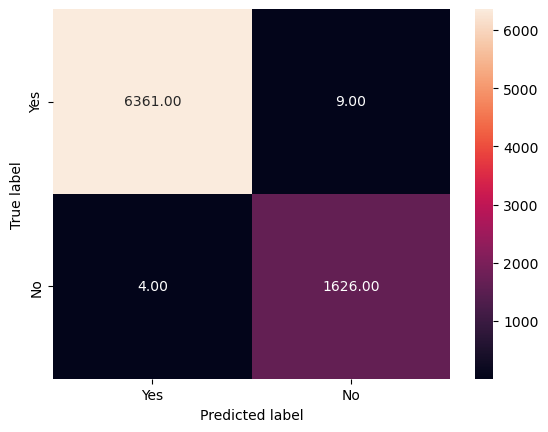


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



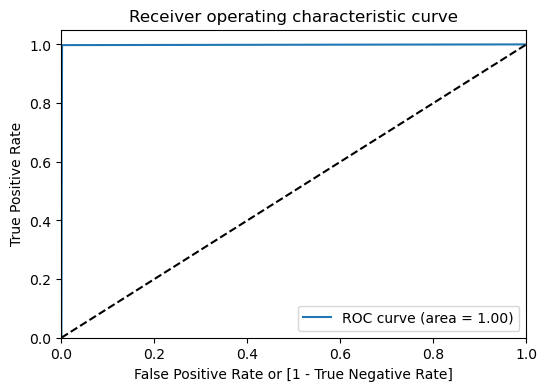


Test  Data
[[1591    1]
 [   0  408]]


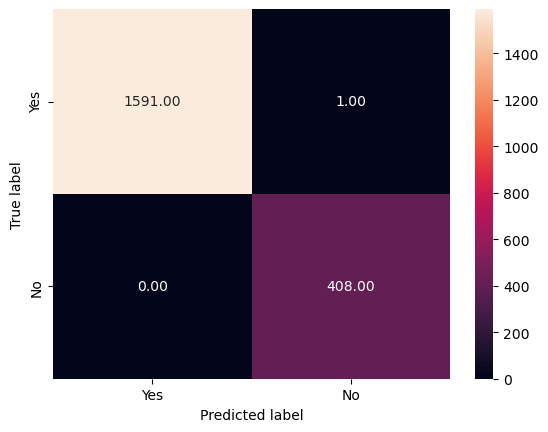


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



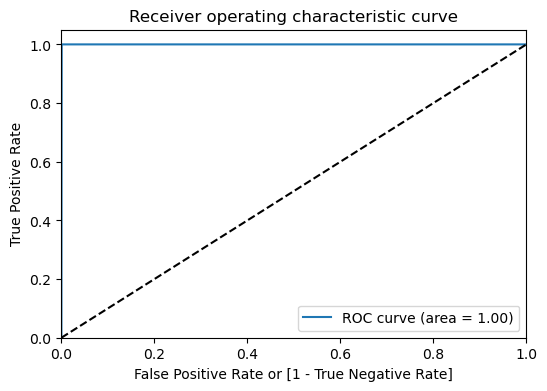

i = 1 Model = KNN
Model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Training Data
[[6362    8]
 [  93 1537]]


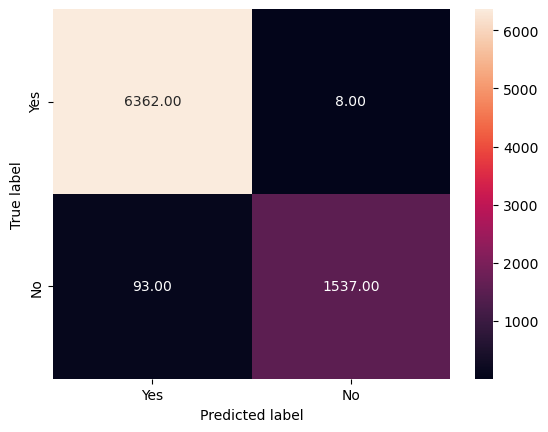


Training Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6370
           1       0.99      0.94      0.97      1630

    accuracy                           0.99      8000
   macro avg       0.99      0.97      0.98      8000
weighted avg       0.99      0.99      0.99      8000



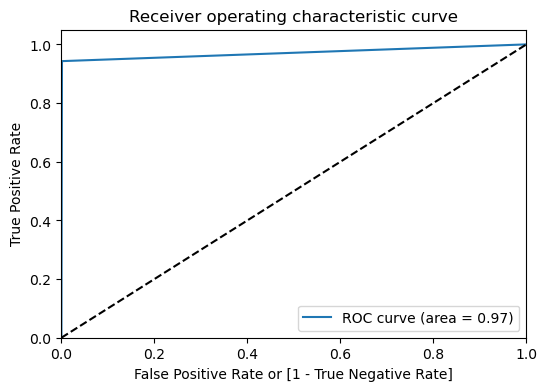


Test  Data
[[1591    1]
 [  45  363]]


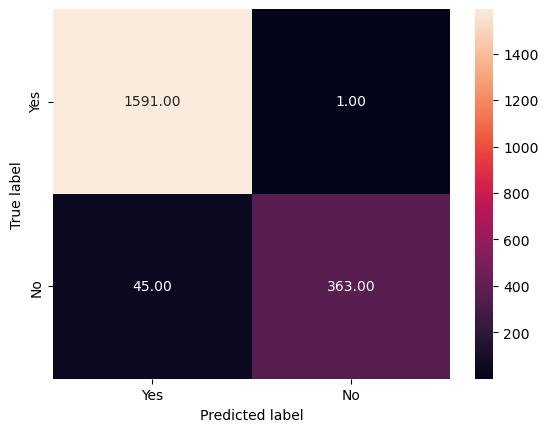


Test  Data
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1592
           1       1.00      0.89      0.94       408

    accuracy                           0.98      2000
   macro avg       0.98      0.94      0.96      2000
weighted avg       0.98      0.98      0.98      2000



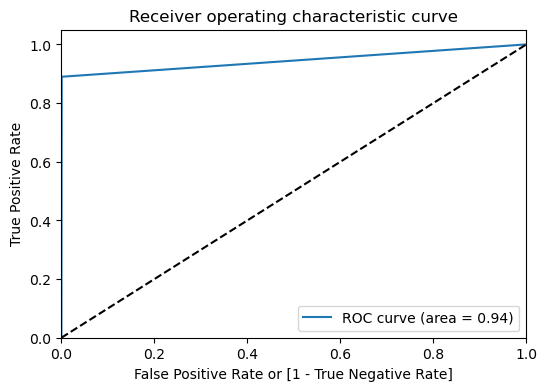

i = 2 Model = CART
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Training Data
[[6370    0]
 [   0 1630]]


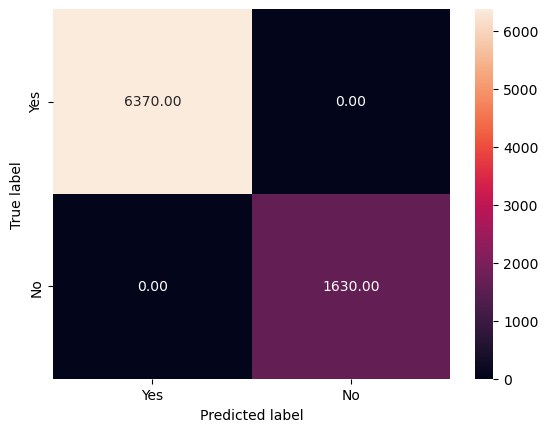


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



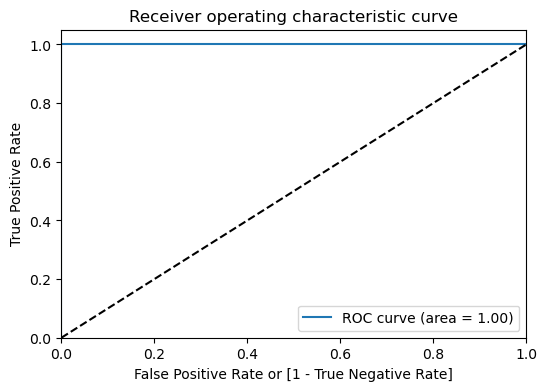


Test  Data
[[1591    1]
 [   5  403]]


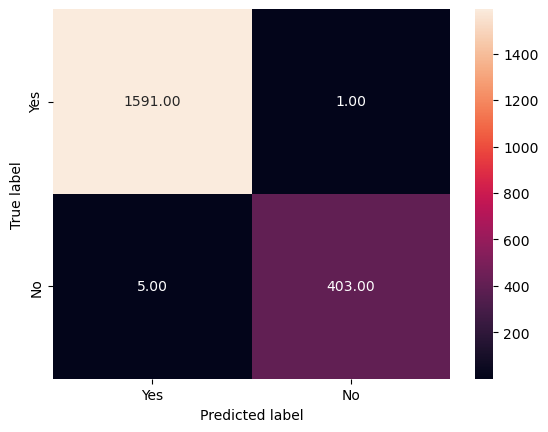


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      0.99      0.99       408

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



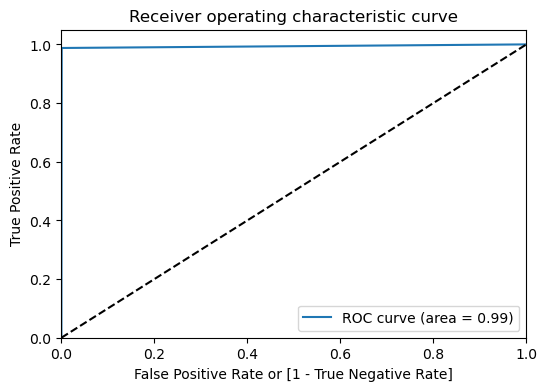

i = 3 Model = NB
Model parameters: {'priors': None, 'var_smoothing': 1e-09}

Training Data
[[6361    9]
 [   4 1626]]


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


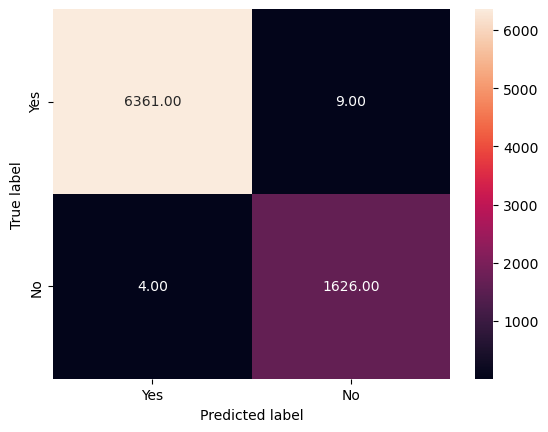


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



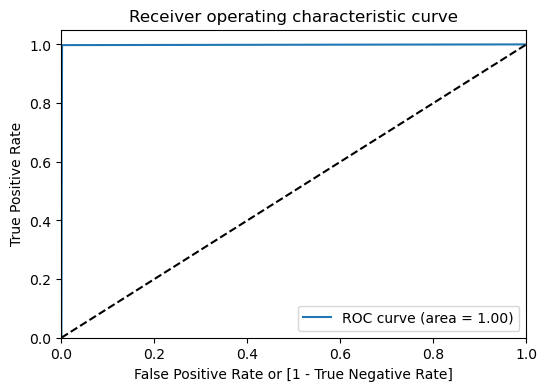


Test  Data
[[1591    1]
 [   0  408]]


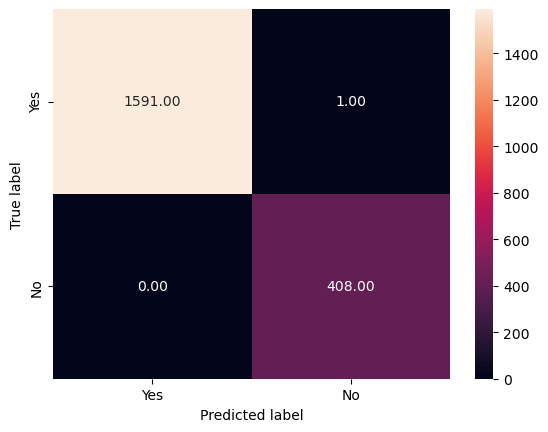


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



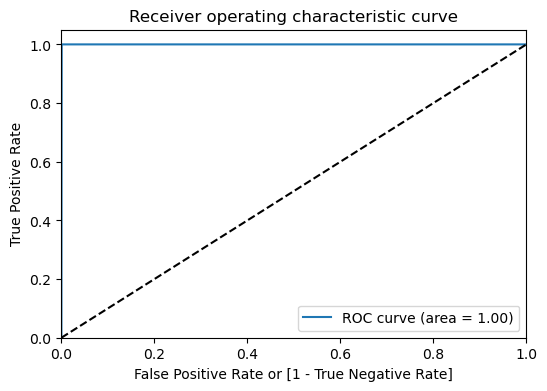

i = 4 Model = RF


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Training Data
[[6370    0]
 [   0 1630]]


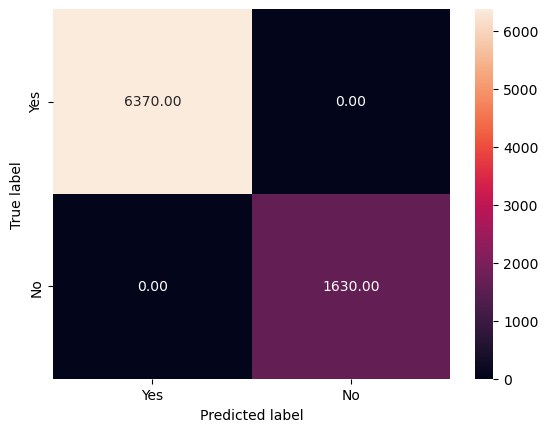


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



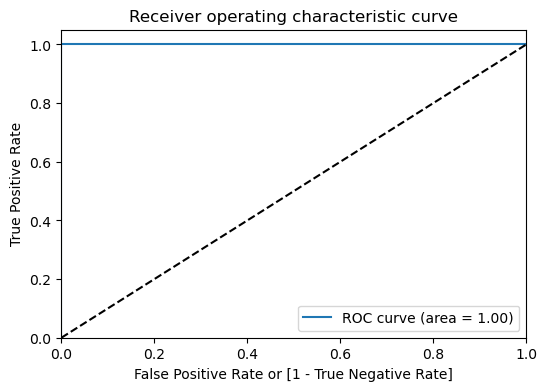


Test  Data
[[1591    1]
 [   0  408]]


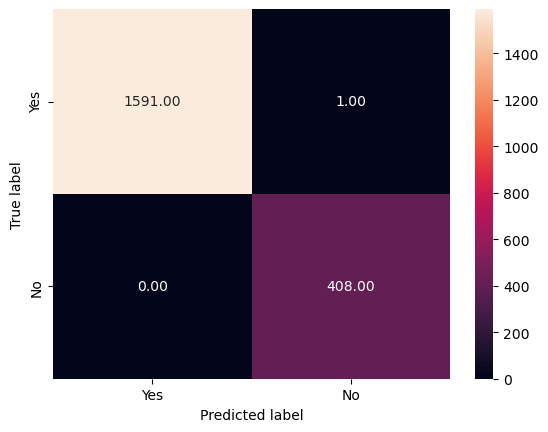


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



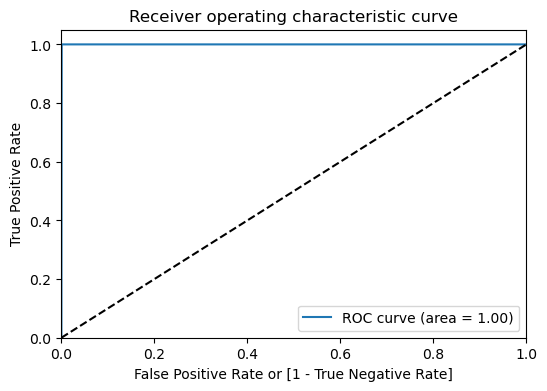

i = 5 Model = XGBoost
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

Training Data
[[6369    1]
 [   1 1629]]


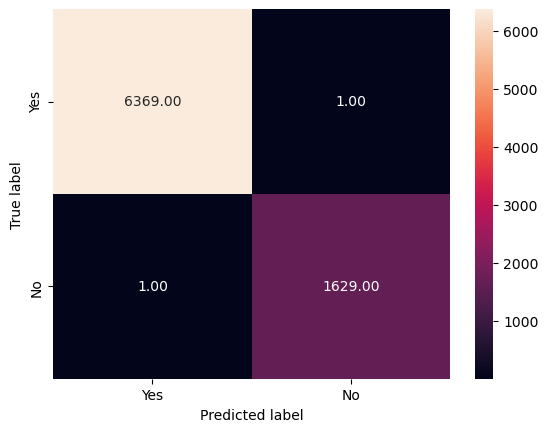


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



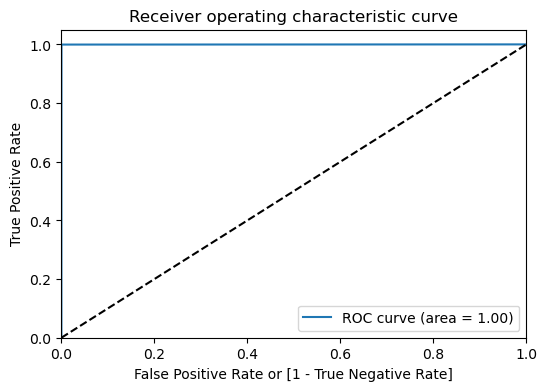


Test  Data
[[1591    1]
 [   0  408]]


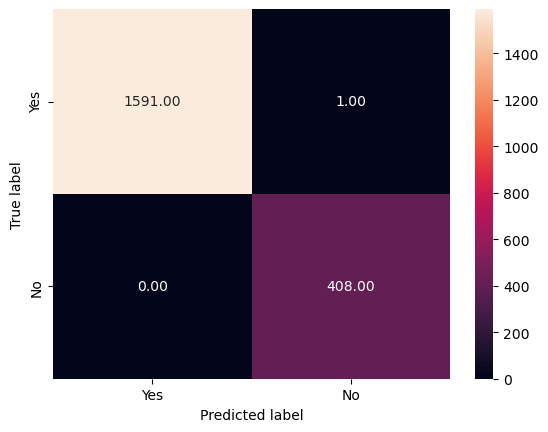


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



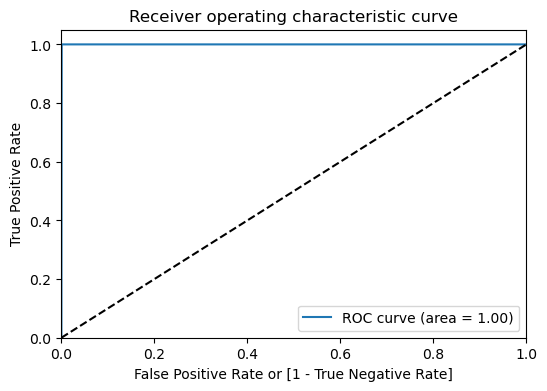

i = 6 Model = AdaBoost


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model parameters: {'algorithm': 'SAMME.R', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

Training Data
[[6361    9]
 [   4 1626]]


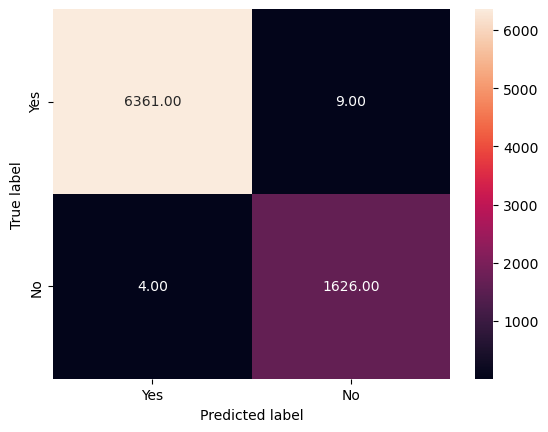


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



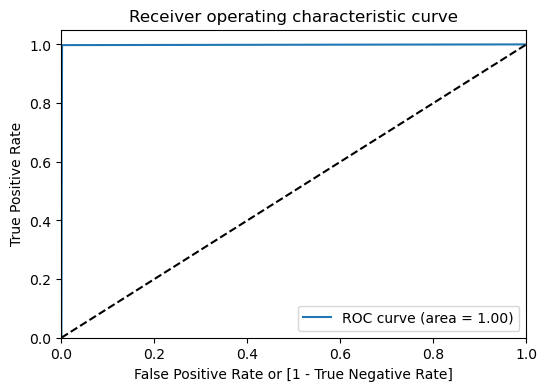


Test  Data
[[1591    1]
 [   0  408]]


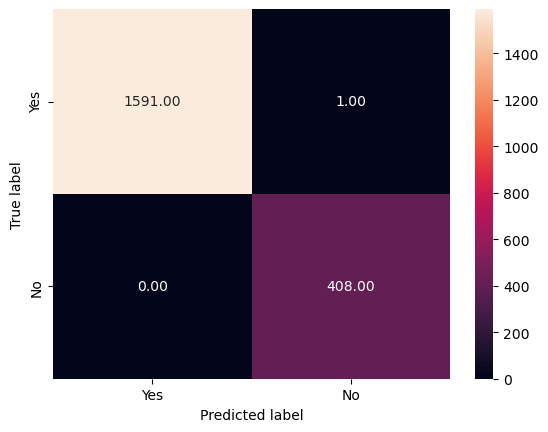


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



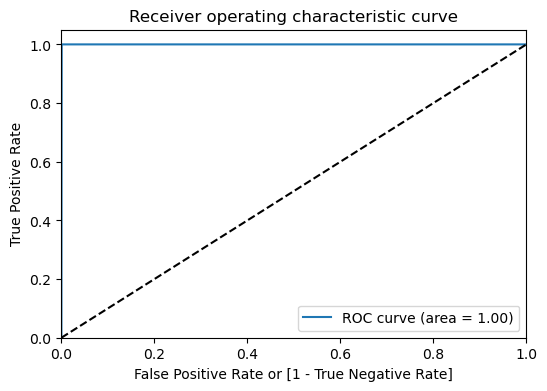

In [22]:
metrics_df    =  pd.DataFrame()
for   i    in   range(len(model_names)):
      model_x            =   model_names[i]
      print("i = %d Model = %s" %(i,model_x))
      classifier         =   models[i] 
      mp_df         =  evaluate_model_performance(model_x, classifier, X_train, y_train, X_test, y_test)
      metrics_df    =  pd.concat([metrics_df, mp_df])

In [23]:
metrics_df.sort_values(by=['Recall Test data'], ascending = False)

,Model,Recall Training data,Recall Test data,F1 Weighted Training data,F1 Weighted Test data,AUROC Training data,AUROC Test data,Precision Training data,Precision Test data
0,LR,0.997546,1.000000,0.998376,0.999500,0.998067,0.999686,0.994495,0.997555
0,NB,0.997546,1.000000,0.998376,0.999500,0.998067,0.999686,0.994495,0.997555
0,RF,1.000000,1.000000,1.000000,0.999500,1.000000,0.999686,1.000000,0.997555
0,XGBoost,0.999387,1.000000,0.999750,0.999500,0.999615,0.999686,0.999387,0.997555
0,AdaBoost,0.997546,1.000000,0.998376,0.999500,0.998067,0.999686,0.994495,0.997555
0,CART,1.000000,0.987745,1.000000,0.996994,1.000000,0.993558,1.000000,0.997525
0,KNN,0.942945,0.889706,0.987248,0.976501,0.970844,0.944539,0.994822,0.997253


In [24]:
time_elapsed = datetime.now() - start_time
print('\nExecution Time for evaluating the performance of 7 models on Raw data not treated for data imbalance')
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))


Execution Time for evaluating the performance of 7 models on Raw data not treated for data imbalance
Time elapsed (hh:mm:ss.ms) 0:00:06.772168


### Synthetic Minority Oversampling TEchnique (SMOTE)

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to **oversample** the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

**Undersampling** is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets.

Undersampling can result in the loss of relevant information by removing valuable and significant patterns.
Undersampling is appropriate when there is plenty of data for an accurate analysis. The data scientist uses all of the rare events but reduces the number of abundant events to create two equally sized classes.

We have **4062 (2.25%) observations for the minority class** and 176457 (97.75%) observations for the majority class. 
So, it was decided to go for **Oversampling** method.

### b) After SMOTE

In [27]:
start_time   =  datetime.now()

For appling SMOTE, we have splitted the data into training and test datasets in the ratio, 80%: 20% and applied SMOTE only on Training data.

As we need to apply SMOTE only on Training data, we have not applied K Fold cross validation.

In [29]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()

In [30]:
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

i = 0 Model = LR
Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Training Data
[[6361    9]
 [  13 6357]]


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


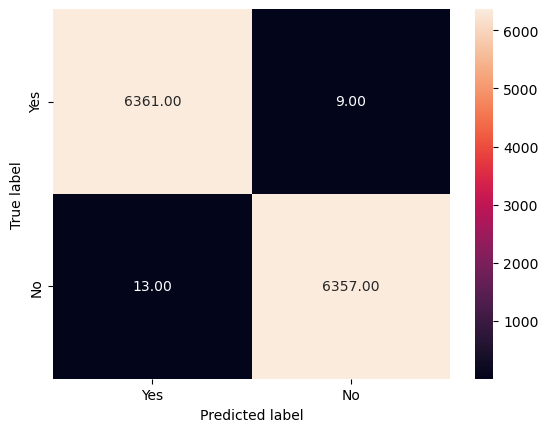


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



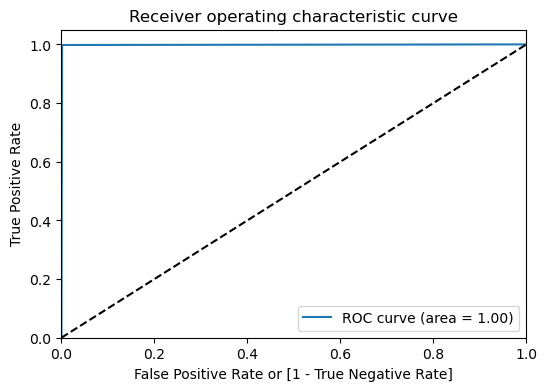


Test  Data
[[1591    1]
 [   0  408]]


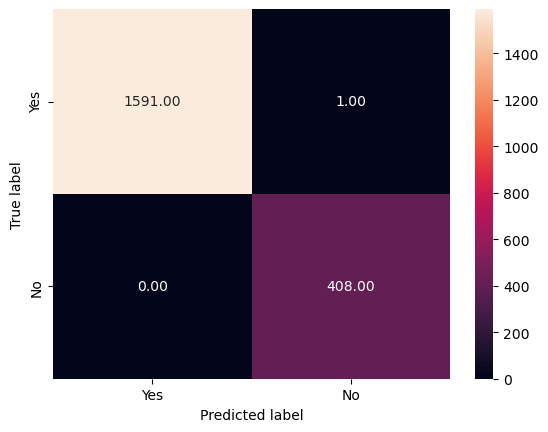


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



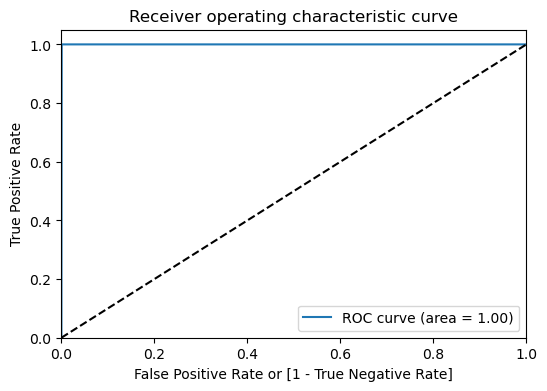

i = 1 Model = KNN
Model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Training Data
[[6349   21]
 [  13 6357]]


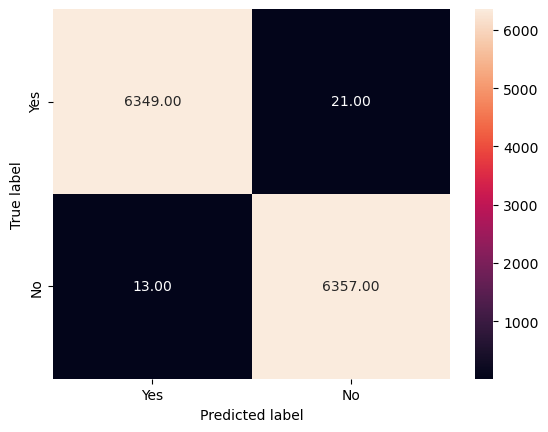


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



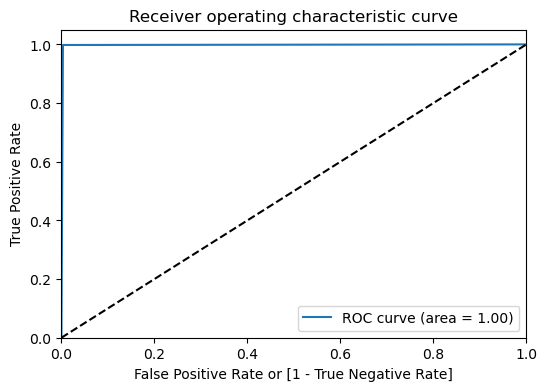


Test  Data
[[1582   10]
 [  10  398]]


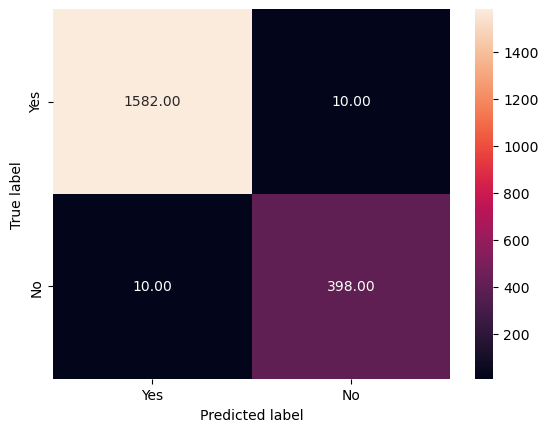


Test  Data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1592
           1       0.98      0.98      0.98       408

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



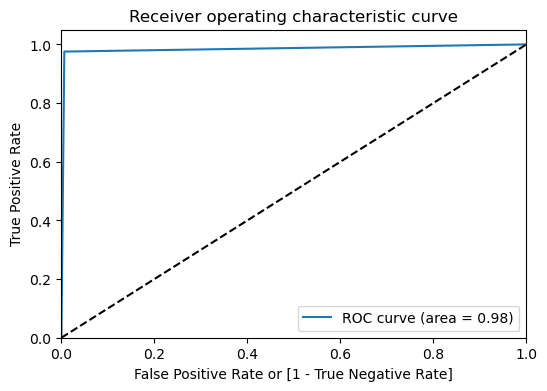

i = 2 Model = CART
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Training Data
[[6370    0]
 [   0 6370]]


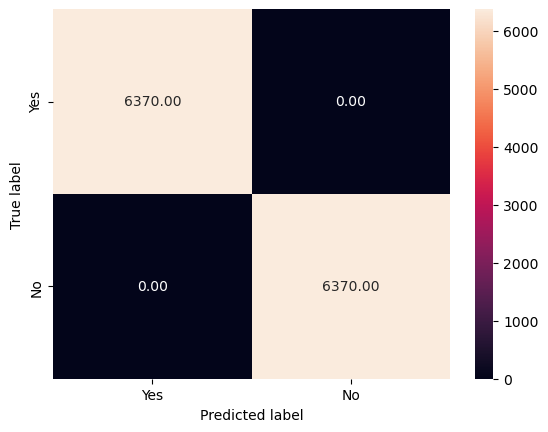


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



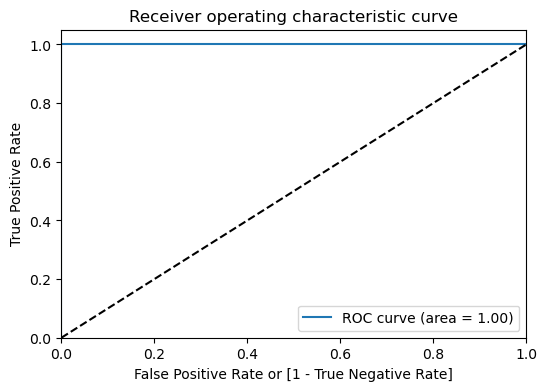


Test  Data
[[1590    2]
 [   2  406]]


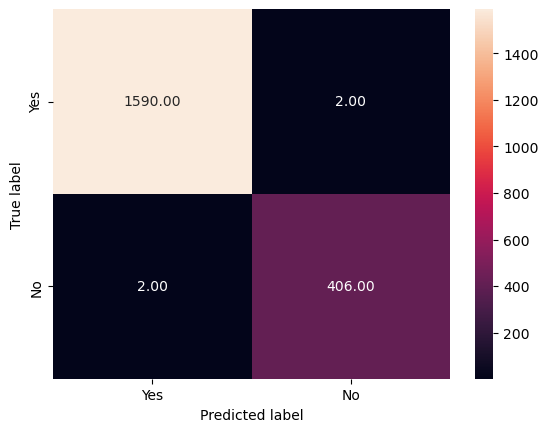


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



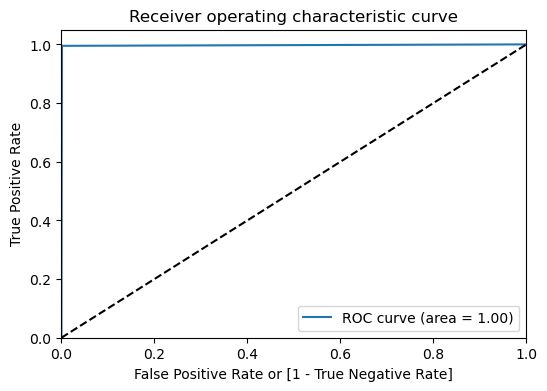

i = 3 Model = NB
Model parameters: {'priors': None, 'var_smoothing': 1e-09}

Training Data
[[6361    9]
 [  13 6357]]


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


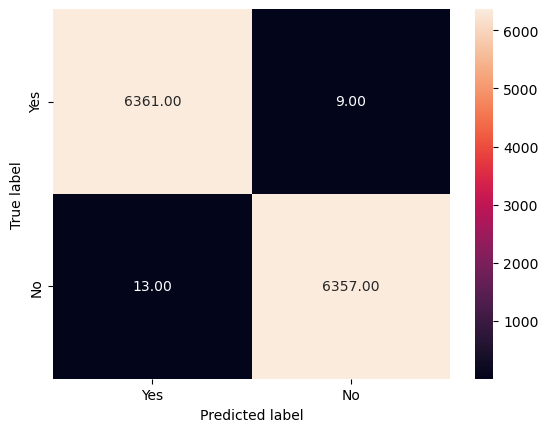


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



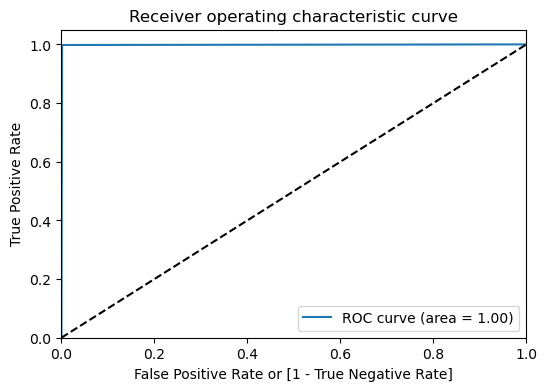


Test  Data
[[1591    1]
 [   0  408]]


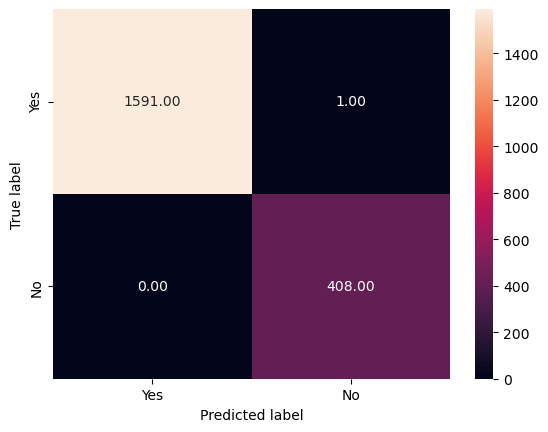


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



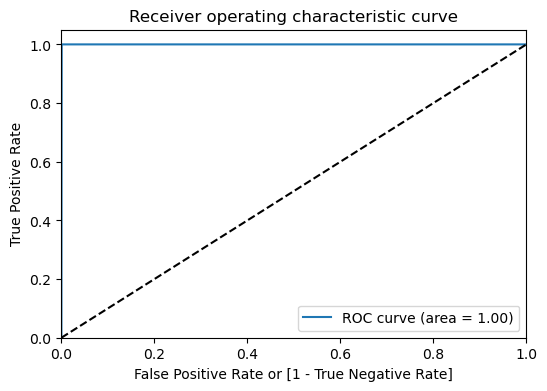

i = 4 Model = RF


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Training Data
[[6370    0]
 [   0 6370]]


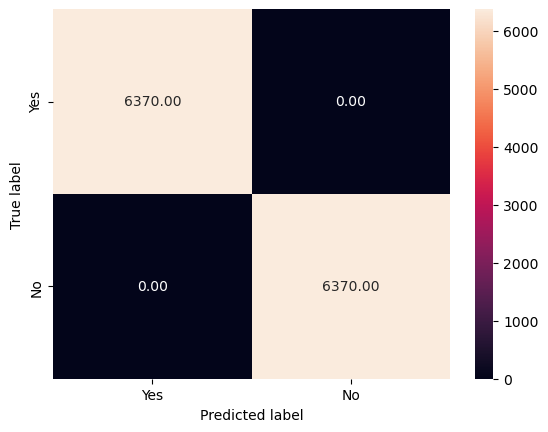


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



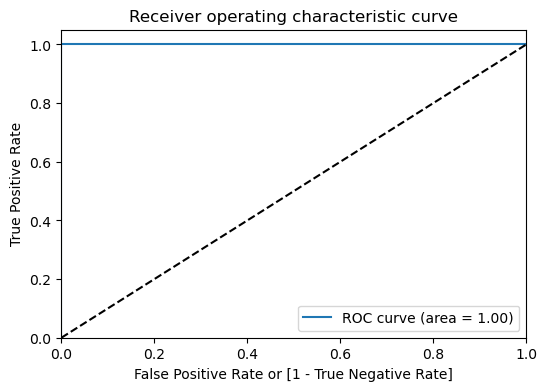


Test  Data
[[1590    2]
 [   0  408]]


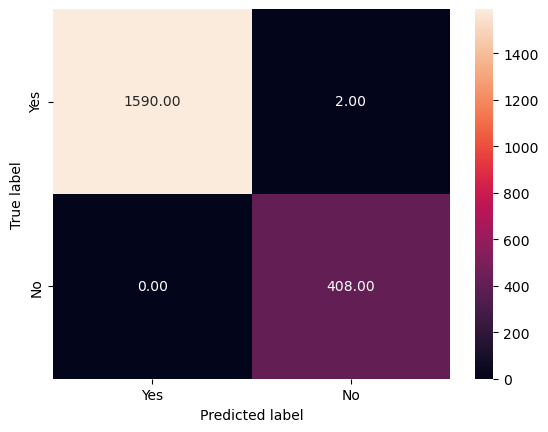


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



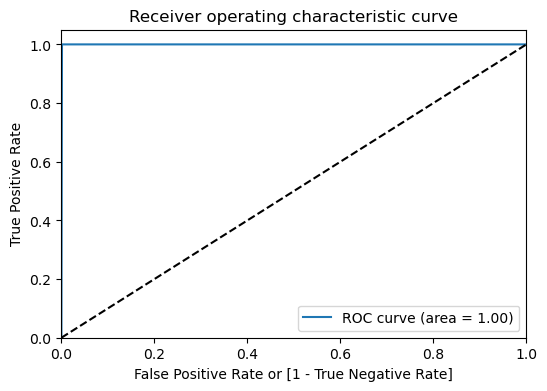

i = 5 Model = XGBoost
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

Training Data
[[6369    1]
 [   0 6370]]


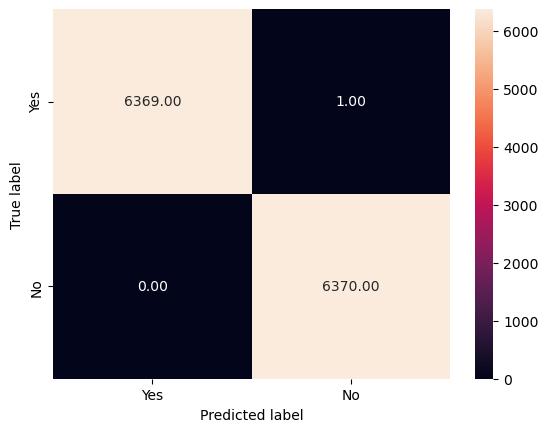


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



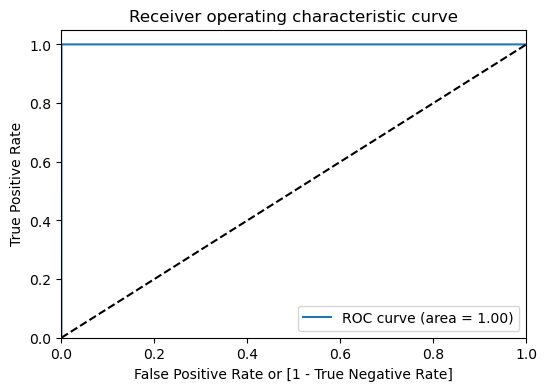


Test  Data
[[1590    2]
 [   0  408]]


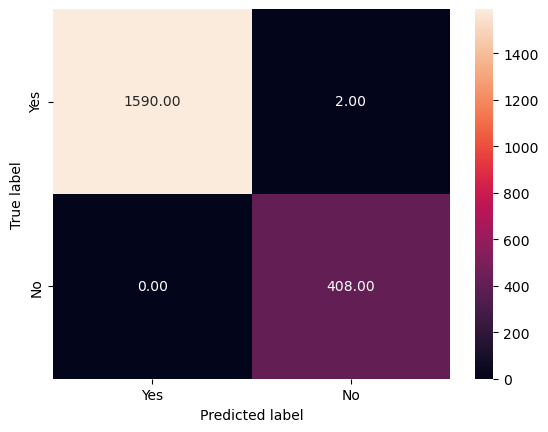


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



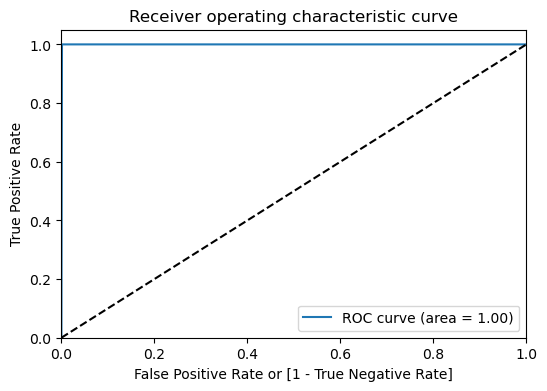

i = 6 Model = AdaBoost


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model parameters: {'algorithm': 'SAMME.R', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

Training Data
[[6361    9]
 [  13 6357]]


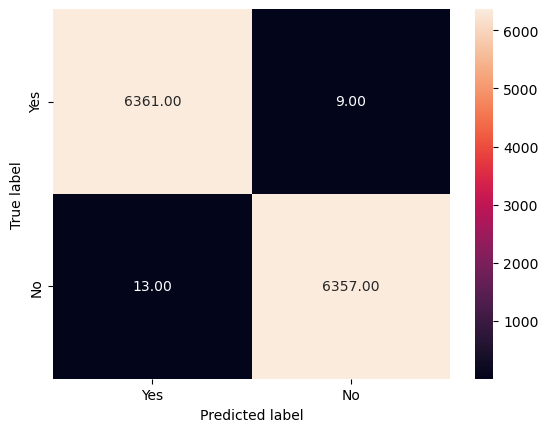


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



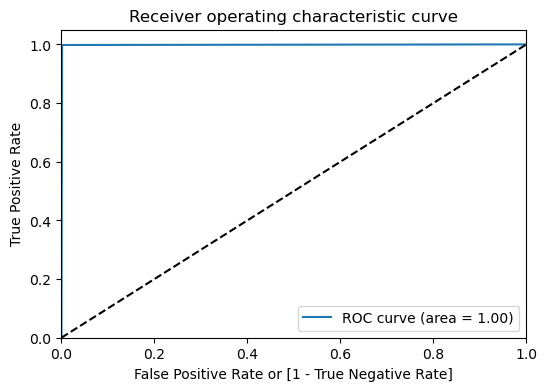


Test  Data
[[1591    1]
 [   0  408]]


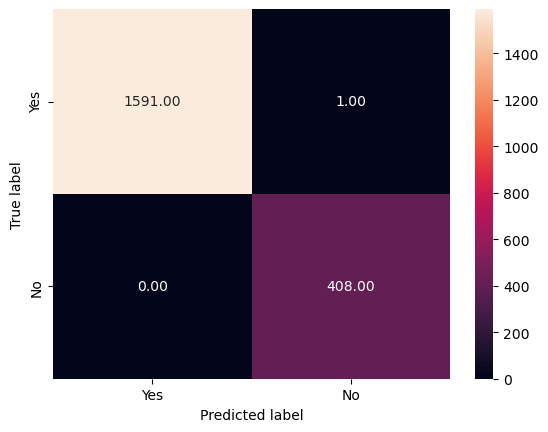


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



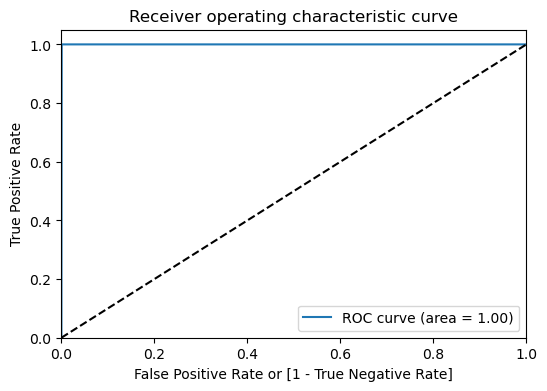

In [31]:
SMOTE_metrics_df =  pd.DataFrame()
for   i    in   range(len(model_names)):
      model_x            =   model_names[i]
      print("i = %d Model = %s" %(i,model_x))
      classifier         =   models[i] 
      smote_df = evaluate_model_performance(model_x, classifier, X_train_SMOTE, y_train_SMOTE, X_test, y_test)
      SMOTE_metrics_df =  pd.concat([SMOTE_metrics_df,smote_df])

In [32]:
SMOTE_metrics_df.sort_values(by=['Recall Test data'], ascending = False)

,Model,Recall Training data,Recall Test data,F1 Weighted Training data,F1 Weighted Test data,AUROC Training data,AUROC Test data,Precision Training data,Precision Test data
0,LR,0.997959,1.000000,0.998273,0.999500,0.998273,0.999686,0.998586,0.997555
0,NB,0.997959,1.000000,0.998273,0.999500,0.998273,0.999686,0.998586,0.997555
0,RF,1.000000,1.000000,1.000000,0.999001,1.000000,0.999372,1.000000,0.995122
0,XGBoost,1.000000,1.000000,0.999922,0.999001,0.999922,0.999372,0.999843,0.995122
0,AdaBoost,0.997959,1.000000,0.998273,0.999500,0.998273,0.999686,0.998586,0.997555
0,CART,1.000000,0.995098,1.000000,0.998000,1.000000,0.996921,1.000000,0.995098
0,KNN,0.997959,0.975490,0.997331,0.990000,0.997331,0.984604,0.996707,0.975490


In [33]:
time_elapsed = datetime.now() - start_time
print('\nExecution Time for evaluating the performance of 8 models on the data treated for data imbalance')
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))


Execution Time for evaluating the performance of 8 models on the data treated for data imbalance
Time elapsed (hh:mm:ss.ms) 0:00:07.431174


### Observations

Without applying SMOTE technique to treat the data imbalance, all the models are performing well with the recall values on both training and test datasets are 99% or above.

After applying SMOTE technique to treat the data imbalance, all the models are performing well with the recall values on both training and test datasets are 99% or above. Recall values of all the models are 100%.

### KFold cross validation

In [36]:
def evaluate_model_performance_KF(name, model, X, y):
    from  sklearn.model_selection import  StratifiedKFold
    from  sklearn.model_selection import  cross_val_score

    # Predict the response for training dataset
    classifier   =  model.fit(X, y)
    scores_req   =  ['roc_auc', 'precision', 'recall', 'F1 Weighted']
    df_model     =  pd.DataFrame()
    for scoring in scores_req:
        score_fn  =  scoring         

        print("\nPerformance Measure : %s" %scoring)

        if scoring == 'F1 Weighted':
            score_fn  =  make_scorer (f1_score, average = 'weighted', zero_division = 0)

        skf           =   StratifiedKFold(n_splits = 10, shuffle = True, random_state = 12345)
        cv_results    =   cross_val_score(model, X, np.ravel(y,order="c"), cv = skf, scoring = score_fn)
        msg = "%s" % (str(round(cv_results.mean(),2)) + " ± " + str(round(cv_results.std(),2)))
        print(msg)
        df_measures_tuned.at[name, scoring] = round(cv_results.mean(),2)
        indices_      =   list(range(1, 11))
        df_ind        =   pd.DataFrame({'Score' : scoring, 'Name' : name, 'Resuts' : cv_results}, index = indices_)
        df_model      =   pd.concat([df_model, df_ind]) 
    xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
    return xdf    

In [37]:
Kfold_metrics_df  =  pd.DataFrame()

In [38]:
for   i    in   range(len(model_names)):
      model_x            =   model_names[i]
      classifier         =   models[i] 
      print("i = %d Model = %s" %(i,model_x))
      KFold_df           =   evaluate_model_performance_KF(model_x, classifier, X_, y)
      Kfold_metrics_df   =   pd.concat([Kfold_metrics_df, KFold_df])

i = 0 Model = LR

Performance Measure : roc_auc
1.0 ± 0.0

Performance Measure : precision


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0 ± 0.0

Performance Measure : recall
1.0 ± 0.0

Performance Measure : F1 Weighted
1.0 ± 0.0
i = 1 Model = KNN

Performance Measure : roc_auc


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function mean at 0x00000261337719E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function std at 0x0000026133771B20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

1.0 ± 0.0

Performance Measure : precision
1.0 ± 0.01

Performance Measure : recall
0.89 ± 0.02

Performance Measure : F1 Weighted


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.89' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_measures_tuned.at[name, scoring] = round(cv_results.mean(),2)


0.98 ± 0.0
i = 2 Model = CART

Performance Measure : roc_auc


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.98' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_measures_tuned.at[name, scoring] = round(cv_results.mean(),2)
C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function mean at 0x00000261337719E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function std at 0x0000026133771B20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To k

0.99 ± 0.0

Performance Measure : precision


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.99' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_measures_tuned.at[name, scoring] = round(cv_results.mean(),2)


0.99 ± 0.01

Performance Measure : recall
0.99 ± 0.01

Performance Measure : F1 Weighted


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.99' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_measures_tuned.at[name, scoring] = round(cv_results.mean(),2)


1.0 ± 0.0
i = 3 Model = NB

Performance Measure : roc_auc
1.0 ± 0.0

Performance Measure : precision
1.0 ± 0.0

Performance Measure : recall
1.0 ± 0.0

Performance Measure : F1 Weighted


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function mean at 0x00000261337719E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function std at 0x0000026133771B20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

1.0 ± 0.0
i = 4 Model = RF


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function mean at 0x00000261337719E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function std at 0x0000026133771B20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  retur


Performance Measure : roc_auc
1.0 ± 0.0

Performance Measure : precision
1.0 ± 0.0

Performance Measure : recall
1.0 ± 0.0

Performance Measure : F1 Weighted
1.0 ± 0.0
i = 5 Model = XGBoost

Performance Measure : roc_auc


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function mean at 0x00000261337719E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function std at 0x0000026133771B20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])


1.0 ± 0.0

Performance Measure : precision
1.0 ± 0.0

Performance Measure : recall
1.0 ± 0.0

Performance Measure : F1 Weighted
1.0 ± 0.0
i = 6 Model = AdaBoost


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function mean at 0x00000261337719E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function std at 0x0000026133771B20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav


Performance Measure : roc_auc


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anacond

1.0 ± 0.0

Performance Measure : precision


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anacond

1.0 ± 0.0

Performance Measure : recall


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anacond

1.0 ± 0.0

Performance Measure : F1 Weighted


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PVS\anacond

1.0 ± 0.0


C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function mean at 0x00000261337719E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])
C:\Users\PVS\AppData\Local\Temp\ipykernel_9456\4014986194.py:25: FutureWarning: The provided callable <function std at 0x0000026133771B20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  xdf           = df_model.groupby(["Name", "Score"]).agg([np.mean, np.std])


In [39]:
Kfold_metrics_df

Resuts          
                          mean       std
Name     Score                          
LR       F1 Weighted  0.998601  0.001348
         precision    0.995129  0.005122
         recall       0.998039  0.002531
         roc_auc      0.998949  0.001220
KNN      F1 Weighted  0.975141  0.005078
         precision    0.995017  0.006072
         recall       0.885181  0.021224
         roc_auc      0.995903  0.002961
CART     F1 Weighted  0.996597  0.001897
         precision    0.992666  0.006575
         recall       0.990182  0.006131
         roc_auc      0.993478  0.003064
NB       F1 Weighted  0.998601  0.001348
         precision    0.995129  0.005122
         recall       0.998039  0.002531
         roc_auc      0.999095  0.000950
RF       F1 Weighted  0.998601  0.001348
         precision    0.995129  0.005122
         recall       0.998039  0.002531
         roc_auc      0.999085  0.001560
XGBoost  F1 Weighted  0.998601  0.001348
         precision    0.995129  0.005122
         recall       0.998039  0.002531
         roc_auc      0.998532  0.001893
AdaBoost F1 Weighted  0.998601  0.001348
         precision    0.995129  0.005122
         recall       0.998039  0.002531
         roc_auc      0.998488  0.001760

### We need to choose the best model. 

### Do we need tune the hyper parameters of all the models and again compare?